# Perceptron

## Training data

* Feature mtrix: $X_{n\times(m+1)}$, including the dummy feature $x_0$ set to 1.
* Label vector: $y_{n\times1}$

Perceptron can only solve binary classification problems

## Setup 

In [2]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1234)
# Polynomial transform

import itertools
import functools

def get_combinations(x, degree):
    return itertools.combinations_with_replacement(x, degree)

def compute_new_features(items):
    #reduce(lambda x, y: x * y, items, [1,2,3,4,5]) calculates ((((1*2)*3)*4)*5)
    return functools.reduce(lambda x, y: x * y, items)

def polynomial_transform(x, degree, logging=False):
    # Converts to feature matrix.
    if x.ndim == 1:
        x = x[:, None]

    x_t = x.transpose() #transposes the feature matrix
    features = [np.ones(len(x))] # populates 1s as the first features

    if logging:
        print ("Input:", x)
    
    for degree in range(1, degree+1):
        for items in get_combinations(x_t, degree):
            features.append(compute_new_features(items))
            if logging:
                print (items, ":", compute_new_features(items))

    if logging:
        print(np.asarray(features).transpose())

    return np.asarray(features).transpose()

## Perceptron Class

In [14]:
class Perceptron:
    '''Implements perceptron classificaation algorithm.

        It usees the following class variables:

        w: Stored the final weight vecot
        w_all: Stores all the weight vectors in training iterations
        errors_all: Stores all errors in training iterations
    '''

    def __init__(self):
        return

    def predict(self, X):
        '''Predicts labels for input fature matrix X.'''
        z = X @ self.w
        return np.where(z >= 0, 1, -1)

    def loss(self, X, y):
        '''Calculates loss.
        
        Calculates loss due to current weight vector w on feature matrix X
        and label vector y.

        Args:
            X: feature matrix
            y; label vector

        Returns:
            loss
        '''

        return np.sum(np.maximum(-1*self.predict(X)*y, np.zeros(y.shape[0])))

    def train(self, X, y, epochs=10, lr=0.001):
        '''Implements perceptron update rule.
        
        Args:
            X: feature matrix
            y: Label vector
            epochs: Number of epochs
            lr: Learning rate

        Returns:
            None
        '''

        self.w = np.zeros(X.shape[1])
        self.errors_all = []
        self.w_all = []

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w += lr * (target - self.predict(xi))*xi
                errors += (max(-1*self.predict(xi)*target, 0))

            self.errors_all.append(errors)
            self.w_all.append(self.w)

            print("w: ", self.w)
            print("J(w): ", self.errors_all[-1])
            
            #Commented for visualisation. Uncomment in actual visualisation
            #if self.loss(X, y) == 0:
            ##    break
                    

### Synthetic data generator

In [15]:
def create_toy_data(add_outliers = False, factor=1):
    x0 = np.random.normal(size=50).reshape(-1, 2) - 2*factor
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2*factor

    if add_outliers:
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_1]), np.concatenate([-np.ones(25), np.ones(30)]).astype(int)
    
    return np.concatenate([x0, x1]), np.concatenate([-np.ones(25), np.ones(25)]).astype(int)

### Model visualisation

In [16]:
# model visualisation

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

def visualize_model(X_train, labels, lsc_obj, degree=1):
    
    f = plt.figure(figsize=(8, 8))

    #compute xlim and ylim
    x1_min = np.min(x_train[:, 1])
    x1_max = np.max(x_train[:, 1])
    x2_min = np.min(x_train[:, 2])
    x2_max = np.max(x_train[:, 2])

    x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
    x_test_poly = polynomial_transform(x_test, degree=degree)
    y_test = lsc_obj.predict(x_test_poly)

    sns.scatterplot(data=X_train, x=X_train[:,1], y=X_train[:,2], hue=labels)
    plt.contourf(x1_test, x2_test, y_test.reshape(100, 100), alpha = 0.5,
                levels = np.linspace(0,1,3))
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

## Demonstration

### Linearly seperable case

In [17]:
from sklearn.model_selection import train_test_split
x, y = create_toy_data()
x_poly = polynomial_transform(x, degree=1)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y)

w:  [-2.          3.0999974   2.96904094]
J(w):  0
w:  [-2.          3.0999974   2.96904094]
J(w):  0
w:  [-2.          3.0999974   2.96904094]
J(w):  0
w:  [-2.          3.0999974   2.96904094]
J(w):  0
w:  [-2.          3.0999974   2.96904094]
J(w):  0
w:  [-2.          3.0999974   2.96904094]
J(w):  0
w:  [-2.          3.0999974   2.96904094]
J(w):  0
w:  [-2.          3.0999974   2.96904094]
J(w):  0
w:  [-2.          3.0999974   2.96904094]
J(w):  0
w:  [-2.          3.0999974   2.96904094]
J(w):  0


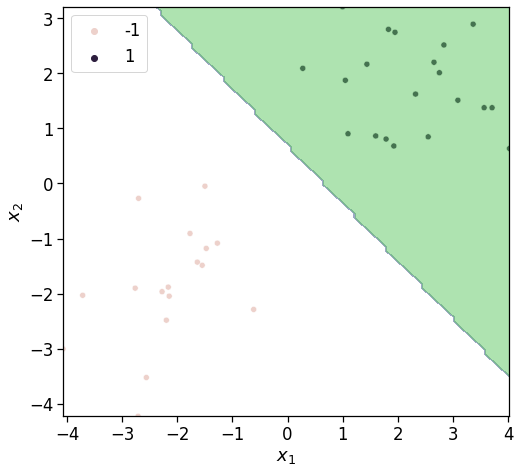

In [18]:
perceptron_obj = Perceptron()
perceptron_obj.train(x_train, y_train, lr =1)
visualize_model(x_train, y_train, perceptron_obj, degree=1)

In [19]:
perceptron_obj.errors_all

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Text(0.5, 1.0, 'Learning Curve')

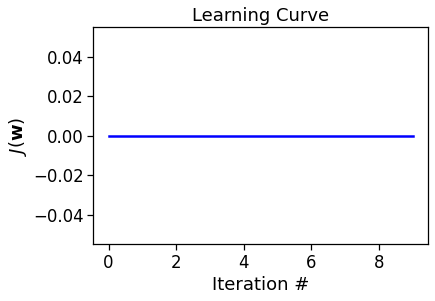

In [20]:
plt.plot(np.arange(len(perceptron_obj.errors_all)), perceptron_obj.errors_all, 'b-')
plt.xlabel('Iteration #')
plt.ylabel('$J(\mathbf{w})$')
plt.title("Learning Curve")

### Linearly non_seperable case

w:  [2.         3.62380469 3.40133546]
J(w):  1
w:  [0.         2.31788132 4.71699236]
J(w):  2
w:  [0.         1.99730452 4.79261674]
J(w):  2
w:  [0.         1.73081963 3.22487593]
J(w):  1
w:  [0.         1.14412508 3.97687123]
J(w):  1
w:  [2.         2.19403365 3.63943823]
J(w):  1
w:  [0.         2.1656048  3.84779758]
J(w):  1
w:  [0.         3.78169241 3.03344475]
J(w):  1
w:  [0.         1.64558379 3.17797095]
J(w):  1
w:  [-2.          3.96129422  3.48477518]
J(w):  0


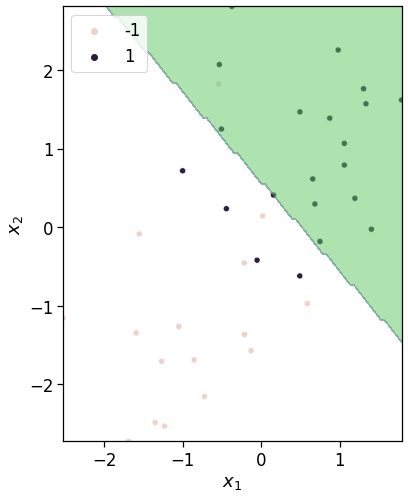

In [21]:
from sklearn.model_selection import train_test_split
x, y = create_toy_data(factor=0.5)
x_poly = polynomial_transform(x, degree=1)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y)

perceptron_obj = Perceptron()
perceptron_obj.train(x_train, y_train, lr=1)
visualize_model(x_train, y_train, perceptron_obj, degree=1)

Text(0.5, 1.0, 'Learning Curve')

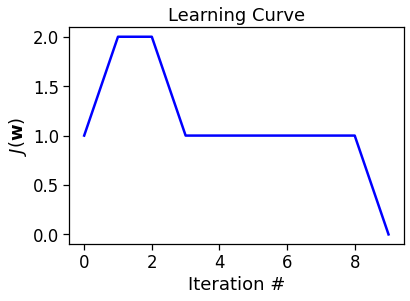

In [22]:
plt.plot(np.arange(len(perceptron_obj.errors_all)), perceptron_obj.errors_all, 'b-')
plt.xlabel('Iteration #')
plt.ylabel('$J(\mathbf{w})$')
plt.title("Learning Curve")

### Non-linearly seperable case

w:  [ 4.         -2.25291867 -0.85686737 -3.10331442 -0.15156017 -5.13668558]
J(w):  3
w:  [ 6.         -0.88287727 -0.19545449 -7.59353215  1.15516542 -6.56646785]
J(w):  1
w:  [ 6.         -0.83110206  0.26038017 -7.6476769   0.87900221 -7.2323231 ]
J(w):  0
w:  [ 6.         -0.83110206  0.26038017 -7.6476769   0.87900221 -7.2323231 ]
J(w):  0
w:  [ 6.         -0.83110206  0.26038017 -7.6476769   0.87900221 -7.2323231 ]
J(w):  0
w:  [ 6.         -0.83110206  0.26038017 -7.6476769   0.87900221 -7.2323231 ]
J(w):  0
w:  [ 6.         -0.83110206  0.26038017 -7.6476769   0.87900221 -7.2323231 ]
J(w):  0
w:  [ 6.         -0.83110206  0.26038017 -7.6476769   0.87900221 -7.2323231 ]
J(w):  0
w:  [ 6.         -0.83110206  0.26038017 -7.6476769   0.87900221 -7.2323231 ]
J(w):  0
w:  [ 6.         -0.83110206  0.26038017 -7.6476769   0.87900221 -7.2323231 ]
J(w):  0


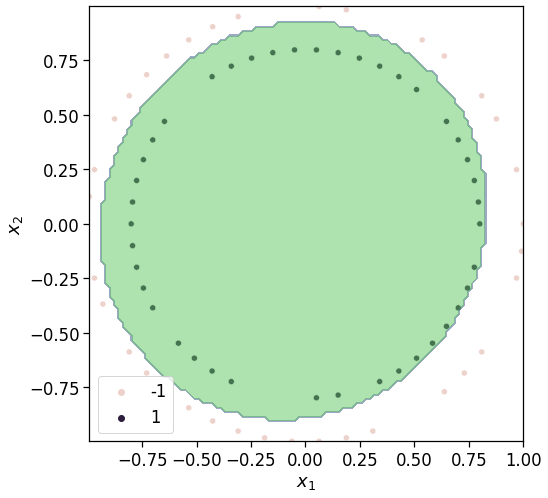

In [25]:
from sklearn.datasets import make_circles
x, y = make_circles()
y_trans = np.where(y==0, -1, 1)
x_poly = polynomial_transform(x, degree=2)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y_trans)

perceptron_obj = Perceptron()
perceptron_obj.train(x_train, y_train, lr=1)
visualize_model(x_train, y_train, perceptron_obj, degree=2)